In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def f(x,y):
    return x**2 + x*y -2*x

def g(x,y):
    return x*y**2 + 3*y


In [42]:
#Creating Grid
coords = np.linspace(-3, 3, 41)
#coords[coords == 0] = 1e-10 
x, y = np.meshgrid(coords, coords)
dxdt = f(x, y)
dydt = g(x, y)
#plt.streamplot(x, y, dxdt, dydt)  # plot streamlines of field.

#Plotting Nullclines
#dxdt = 0
y_null = 2 - coords   # y = 2-x
#Plotting Nullclines
#dydt = 0
#x_null = -3 / coords #x = -3/y
x_null = np.where(coords != 0, -3 / coords, np.nan) #x = -3/y, nan where coords=0

C:\Users\cw171001\AppData\Local\Temp\ipykernel_83408\1685113580.py:15: RuntimeWarning: divide by zero encountered in divide
  x_null = np.where(coords != 0, -3 / coords, np.nan) #x = -3/y, nan where coords=0


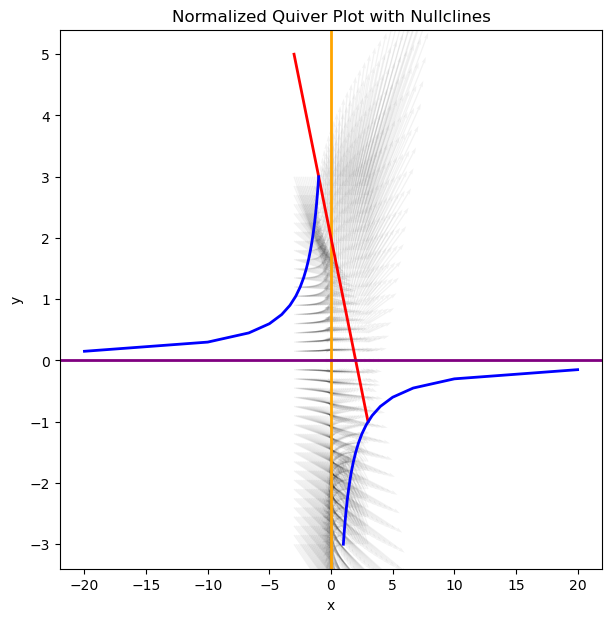

In [43]:
#Plotting
plt.figure(figsize=(7, 7))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized Quiver Plot with Nullclines')
plt.quiver(x, y, dxdt, dydt, scale = 100,alpha=0.05)  # plot field as quiver
#plt.quiver(x, y, dxdt, dydt, angles='xy', scale_units='xy')  # plot field as quiver
plt.axvline(0, color='orange', linestyle='-', label='dx/dt = 0 ($x=0$)', linewidth=2) #x = 0
plt.plot(coords, y_null, 'r',linestyle='-', label='dx/dt = 0 ($y=2-x$)', linewidth=2)
plt.axhline(0, color='purple', linestyle='-', label='dy/dt = 0 ($y=0$)', linewidth=2) #y = 0
plt.plot(x_null, coords, 'b',linestyle='-', label='dy/dt = 0 ($x=-3/y$)', linewidth=2)
#plt.legend()
plt.show()

magnitude: [[43.26661531 41.24501493 39.25702612 ... 16.51224091 17.7417236
  18.97366596]
 [40.4742425  38.55408605 36.66911978 ... 14.58569489 15.6724105
  16.76292952]
 [37.83927721 36.01187385 34.22127246 ... 12.77990176 13.72927196
  14.68410365]
 ...
 [15.40204207 14.07976948 12.77990176 ... 29.26033986 30.59764792
  31.95951971]
 [17.08203168 15.6724105  14.28266416 ... 31.95228232 33.4070584
  34.8850155 ]
 [18.97366596 17.46487207 15.97366896 ... 34.76622067 36.34581484
  37.94733192]]


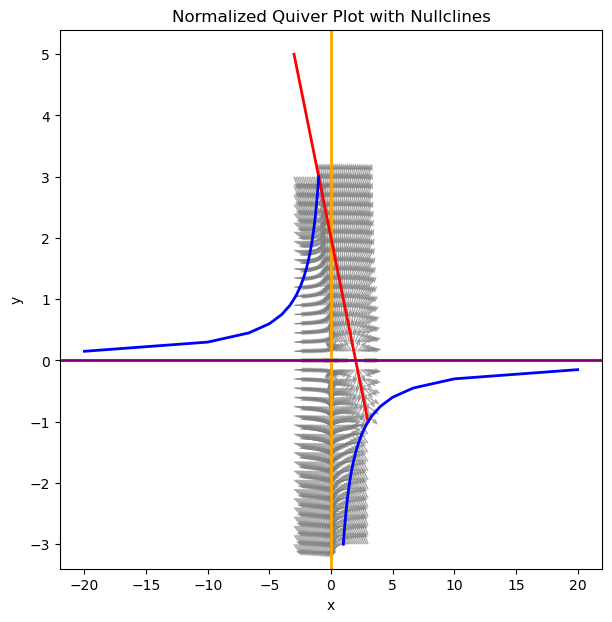

In [49]:
#Plotting
plt.figure(figsize=(7, 7))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normalized Quiver Plot with Nullclines')
# 2. Avoid division by zero at fixed points (where magnitude = 0)
#    We can set the magnitude to 1 at these points, since 0/1 = 0
# 1. Calculate the magnitude (length) of each vector
magnitude = np.hypot(dxdt, dydt)
print("magnitude:", magnitude   )
# 2. Avoid division by zero at fixed points (where magnitude = 0)
#    We can set the magnitude to 1 at these points, since 0/1 = 0
magnitude[magnitude == 0] = 1.0 
# 3. Create normalized vectors (dxdt_n, dydt_n)
dxdt_n = dxdt / magnitude
dydt_n = dydt / magnitude
plt.quiver(x, y, dxdt_n, dydt_n, scale=40, color='gray', alpha=0.7, headwidth=4, headlength=5)
#plt.quiver(x, y, dxdt_n, dydt_n, scale = 100,alpha=0.05)  # plot field as quiver
#plt.quiver(x, y, dxdt, dydt, angles='xy', scale_units='xy')  # plot field as quiver
plt.axvline(0, color='orange', linestyle='-', label='dx/dt = 0 ($x=0$)', linewidth=2) #x = 0
plt.plot(coords, y_null, 'r',linestyle='-', label='dx/dt = 0 ($y=2-x$)', linewidth=2)
plt.axhline(0, color='purple', linestyle='-', label='dy/dt = 0 ($y=0$)', linewidth=2) #y = 0
plt.plot(x_null, coords, 'b',linestyle='-', label='dy/dt = 0 ($x=-3/y$)', linewidth=2)
#plt.legend()
plt.show()